In [9]:
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender

from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVD import PureSVDRecommender

from Base.NonPersonalizedRecommender import TopPop, Random

from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

from KNN.ItemKNNScoresHybridRecommender import ItemKNNScoresHybridRecommender
from KNN.ItemKNNScoresHybridRecommender3 import ItemKNNScoresHybridRecommender3

from KNN.ItemKNNSimilarityHybridRecommender import ItemKNNSimilarityHybridRecommender
from KNN.ItemKNNSimilarityHybridRecommender3 import ItemKNNSimilarityHybridRecommender3
from KNN.ItemKNNSimilarityHybridRecommender4 import ItemKNNSimilarityHybridRecommender4

#from GraphBased.RP3betaRecommender import RP3betaRecommender
#from GraphBased.P3alphaRecommender import P3alphaRecommender

In [24]:
import traceback, os
import scipy.sparse

URM_all = scipy.sparse.load_npz('./Matrix/URM_all_matrix.npz')
#ICM_all = scipy.sparse.load_npz('./Matrix/ICM_all_matrix.npz')
URM_train = scipy.sparse.load_npz('./Matrix/URM_train_matrix.npz')
URM_test = scipy.sparse.load_npz('./Matrix/URM_test_matrix.npz')

#Load playlistsIDS
data_playlists= pd.read_csv('all/train.csv',low_memory = False)
userID=data_playlists.playlist_id.unique()

In [94]:
#CREAZIONE ICM
#Creare la icm con righe: tracks , colonne:features
#Moltipolicare icm per icmT ottenendo la matrice delle similarità
#Rimuovere la diagonale dalla matrice S (funzione lil..)
#Moltiplicare la matrice delle playlist (URM)) per quella delle S ottenendo una votazione
ICM_all=zeros((20635,19413))
ICM_all
#inizializzazione album
for row in data_tracks.itertuples():
    riga = row.track_id
    colonna= row.album_id
    ICM_all[riga,colonna]=1
#test, deve tornare 1   
print (ICM_all[3,3989])

#inizializzazione artist
for row in data_tracks.itertuples():
    riga = row.track_id
    colonna= row.artist_id
    ICM_all[riga,12744+colonna]=0.5
#test, deve tornare 1   
print (ICM_all[1,17647])

#inizializzazione durate
for row in data_tracks.itertuples():
    riga = row.track_id
    durata=row.duration_sec
    if (durata<650):
        ICM_all[riga,19412]=0.2
    elif (durata>650 and durata<1300):
        ICM_all[riga,19412]=0.5
    elif (durata>1300):
        ICM_all[riga,19412]=0.9

        
#numeri tra [0,2] -->0.039
#numeri tra [0,1] -->0.040

1.0
0.5


In [95]:
ICM_all

array([[0. , 0. , 0. , ..., 0. , 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2]])

In [80]:
data_tracks

,track_id,album_id,artist_id,duration_sec
0,0,6306,449,167
1,1,12085,4903,185
2,2,1885,6358,201
3,3,3989,1150,263
4,4,11633,4447,96
5,5,9666,6096,221
6,6,4426,2029,151
7,7,8960,5396,192
8,8,11700,1884,206
9,9,11667,2926,206


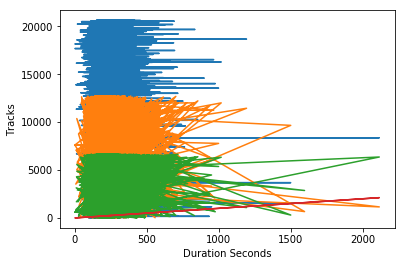

In [67]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(data_tracks.duration_sec, data_tracks)
pyplot.ylabel('Tracks')
pyplot.xlabel('Duration Seconds')
pyplot.show()


In [96]:
ICM_all=sparse.csr_matrix(ICM_all) 
CBFrecommender = ItemKNNCBFRecommender(ICM_all,URM_train)
CBFrecommender.fit()
result = CBFrecommender.evaluateRecommendations(URM_test)
print("Recommender MAP is= {}".format(result["MAP"]))

Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 20600 ( 100 % ), 2770.55 column/sec, elapsed time 0.12 min
SequentialEvaluator: Processed 9676 ( 100.00% ) in 4.88 seconds. Users per second: 1982
Recommender MAP is= 0.04047661850728522
